# OVERVIEW

- Bivariate and Univariate Analysis
- Data Cleaning  
- Preprocessing Data &Data Sampling
- Unsupervised and Supervised Machine Learning
- Customer Segmentation
- Optimizing Hyperparameters
- Risk Classification with Predictive Modeling using XGBoost
- ROC Analysis


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from scipy.stats import uniform
from scipy import interp


from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifierfrom
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans



#metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from bayes_opt import BayesianOptimization


import warnings
warnings.filterwarnings("ignore")


In [68]:

#READ THE DATAFRAME 
df=pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FETURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


# UNIVARIATE ANALYSIS

C:\Users\annan\AppData\Local\Temp\ipykernel_18828\856754049.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit amount'], bins=40, ax=ax[0]);
C:\Users\annan\AppData\Local\Temp\ipykernel_18828\856754049.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'], bins=40, ax=ax[

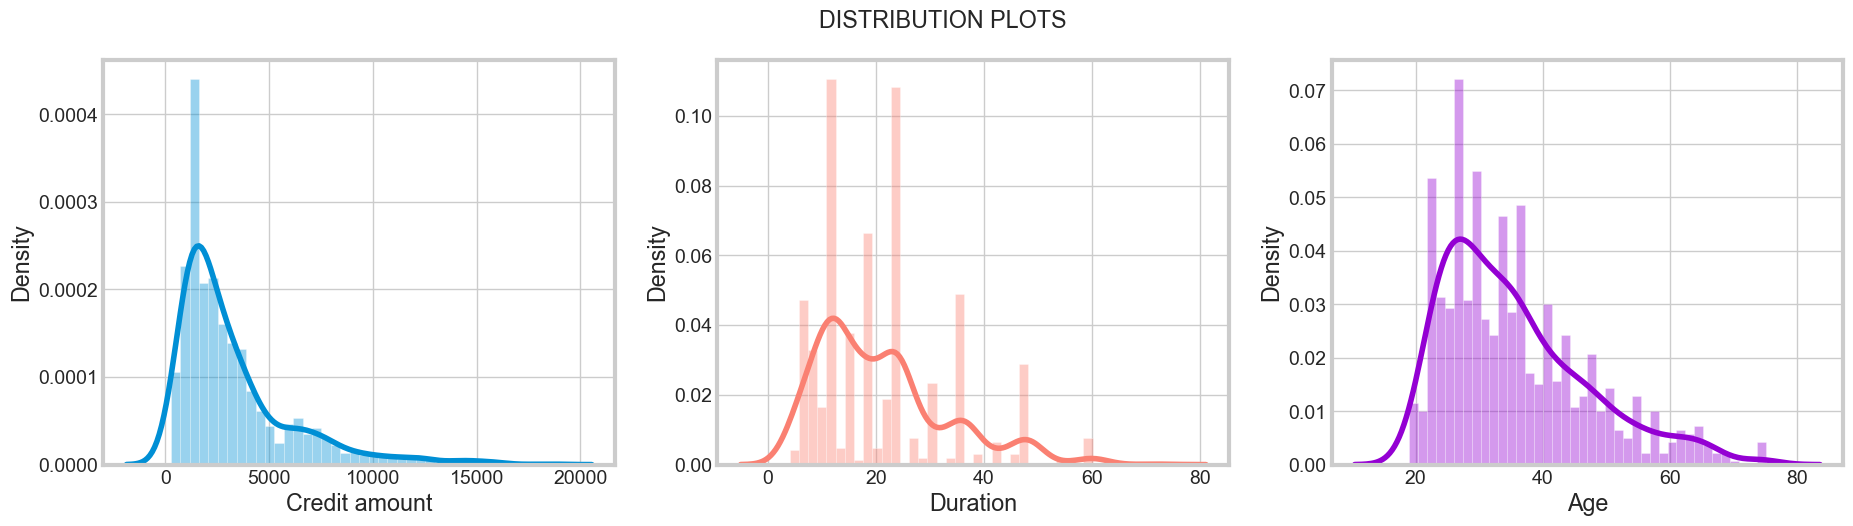

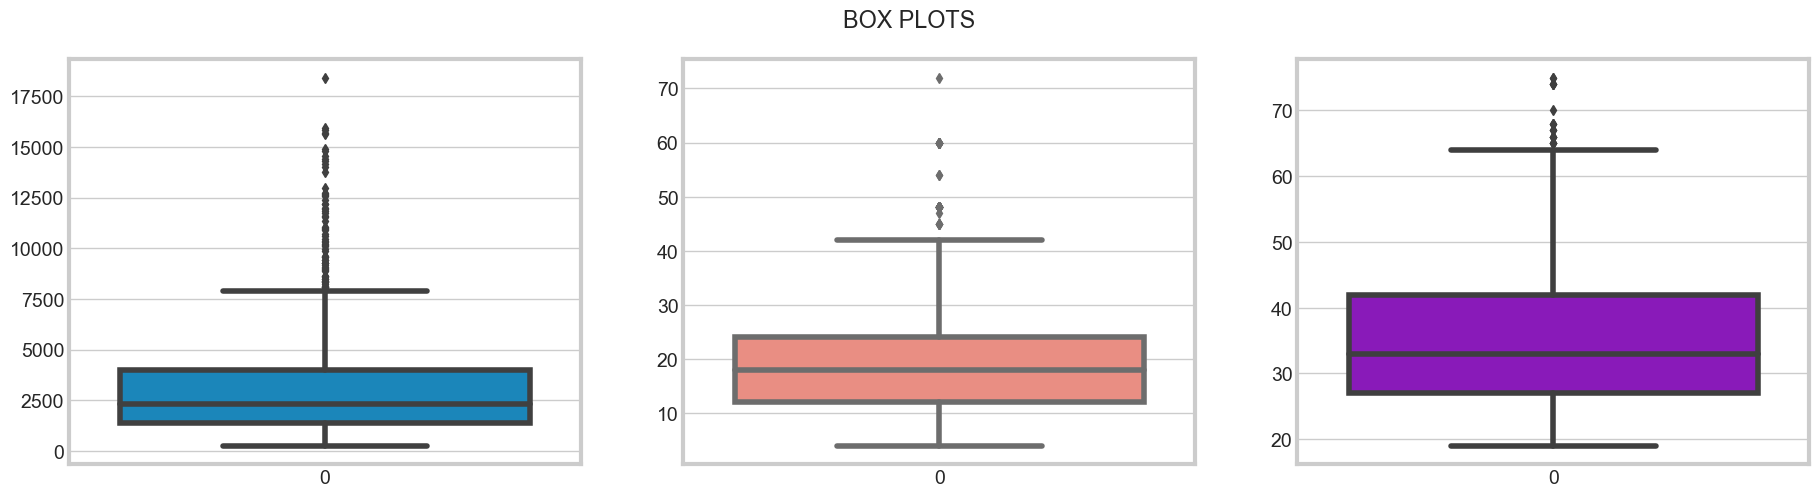

In [67]:

df=pd.read_csv('german_credit_data.csv')

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['Credit amount'], bins=40, ax=ax[0]);
sns.distplot(df['Duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(df['Age'], bins=40, ax=ax[2], color='darkviolet');

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(df['Credit amount'], ax=ax[0]);
sns.boxplot(df['Duration'], ax=ax[1], color='salmon');
sns.boxplot(df['Age'], ax=ax[2], color='darkviolet');

plt.show()

In [ ]:
INSIGHTS
Most of the credit cards have an amount of 1500 - 4000
The Credit amount is positively skewed, So the samples are dispersed

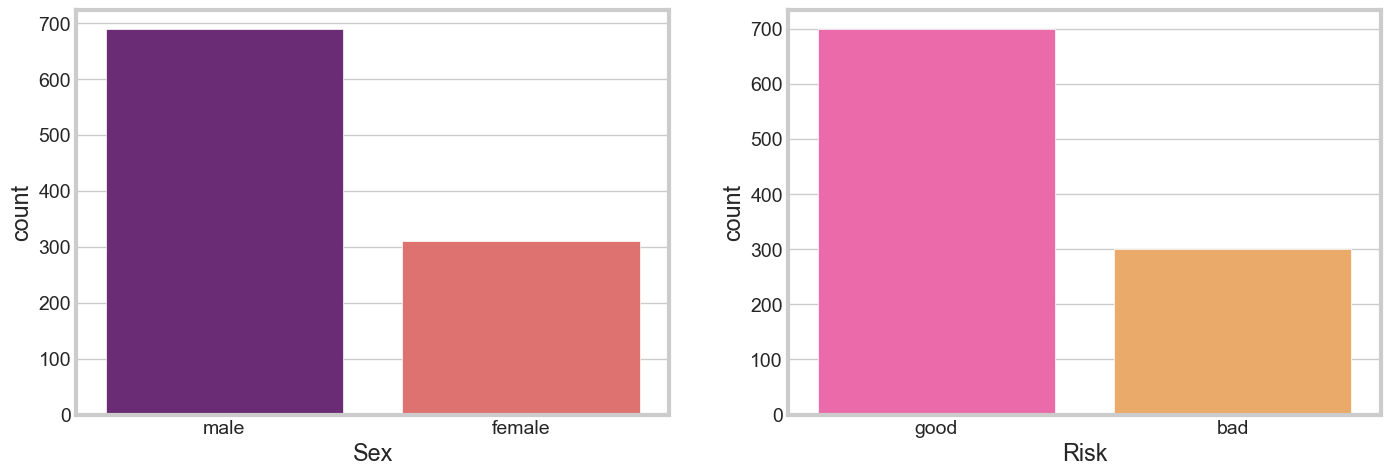

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with columns 'Sex' and 'Risk'
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Use countplot with 'Sex' as the categorical variable
sns.countplot(x='Sex', data=df, ax=ax[0], palette='magma')

# Use countplot with 'Risk' as the categorical variable
sns.countplot(x='Risk', data=df, ax=ax[1], palette='spring')

plt.show()



In [ ]:
#how basic stats
df[['Age', 'Duration', 'Credit amount']].describe()

# BIVARIATE ANALYSIS

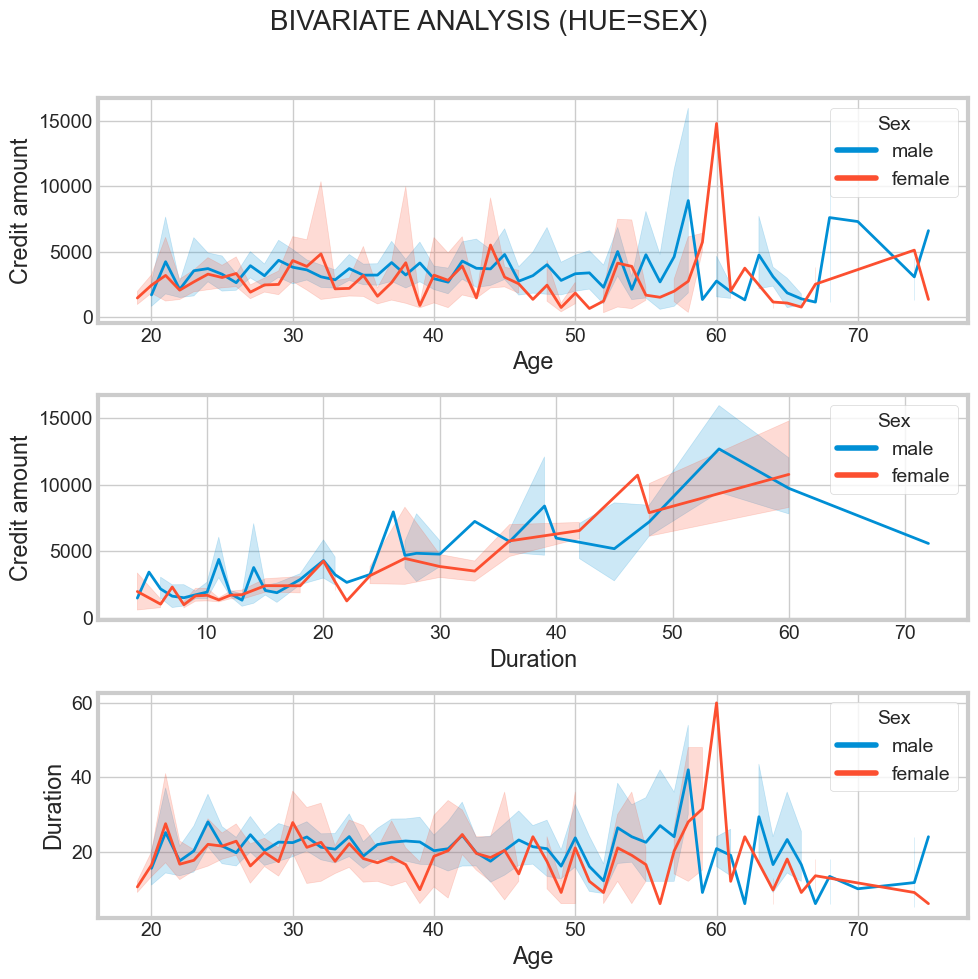

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
plt.suptitle('BIVARIATE ANALYSIS (HUE=SEX)', fontsize=20)

sns.lineplot(data=df, x='Age', y='Credit amount', hue='Sex', lw=2, ax=ax[0])
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Sex', lw=2, ax=ax[1])
sns.lineplot(data=df, x='Age', y='Duration', hue='Sex', lw=2, ax=ax[2])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter as needed

plt.show()


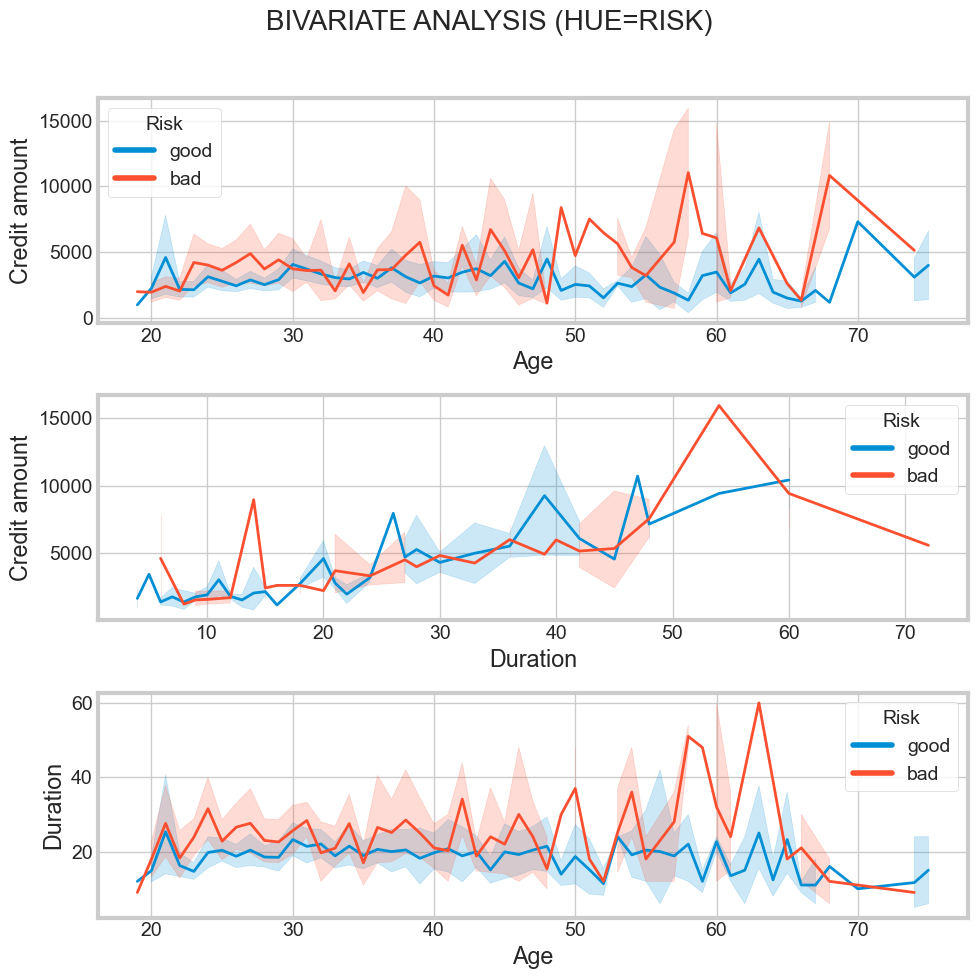

In [14]:
#BIVARIATE ANALYSIS


fig, ax = plt.subplots(3, 1, figsize=(10, 10))
plt.suptitle('BIVARIATE ANALYSIS (HUE=RISK)', fontsize=20)

sns.lineplot(data=df, x='Age', y='Credit amount', hue='Risk', lw=2, ax=ax[0])
sns.lineplot(data=df, x='Duration', y='Credit amount', hue='Risk', lw=2, ax=ax[1])
sns.lineplot(data=df, x='Age', y='Duration', hue='Risk', lw=2, ax=ax[2])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter as needed

plt.show()

INSIGHTS
There is a linear relationship between Duration and Creadit Amount, Which makes sense because usually, people take bigger credits for longer periods.
The trend Between Age and Credit amount is not clear.

# PAIRPLOT TO VISUALIZE FEATURES WITH LINEAR RELATIONSHIP

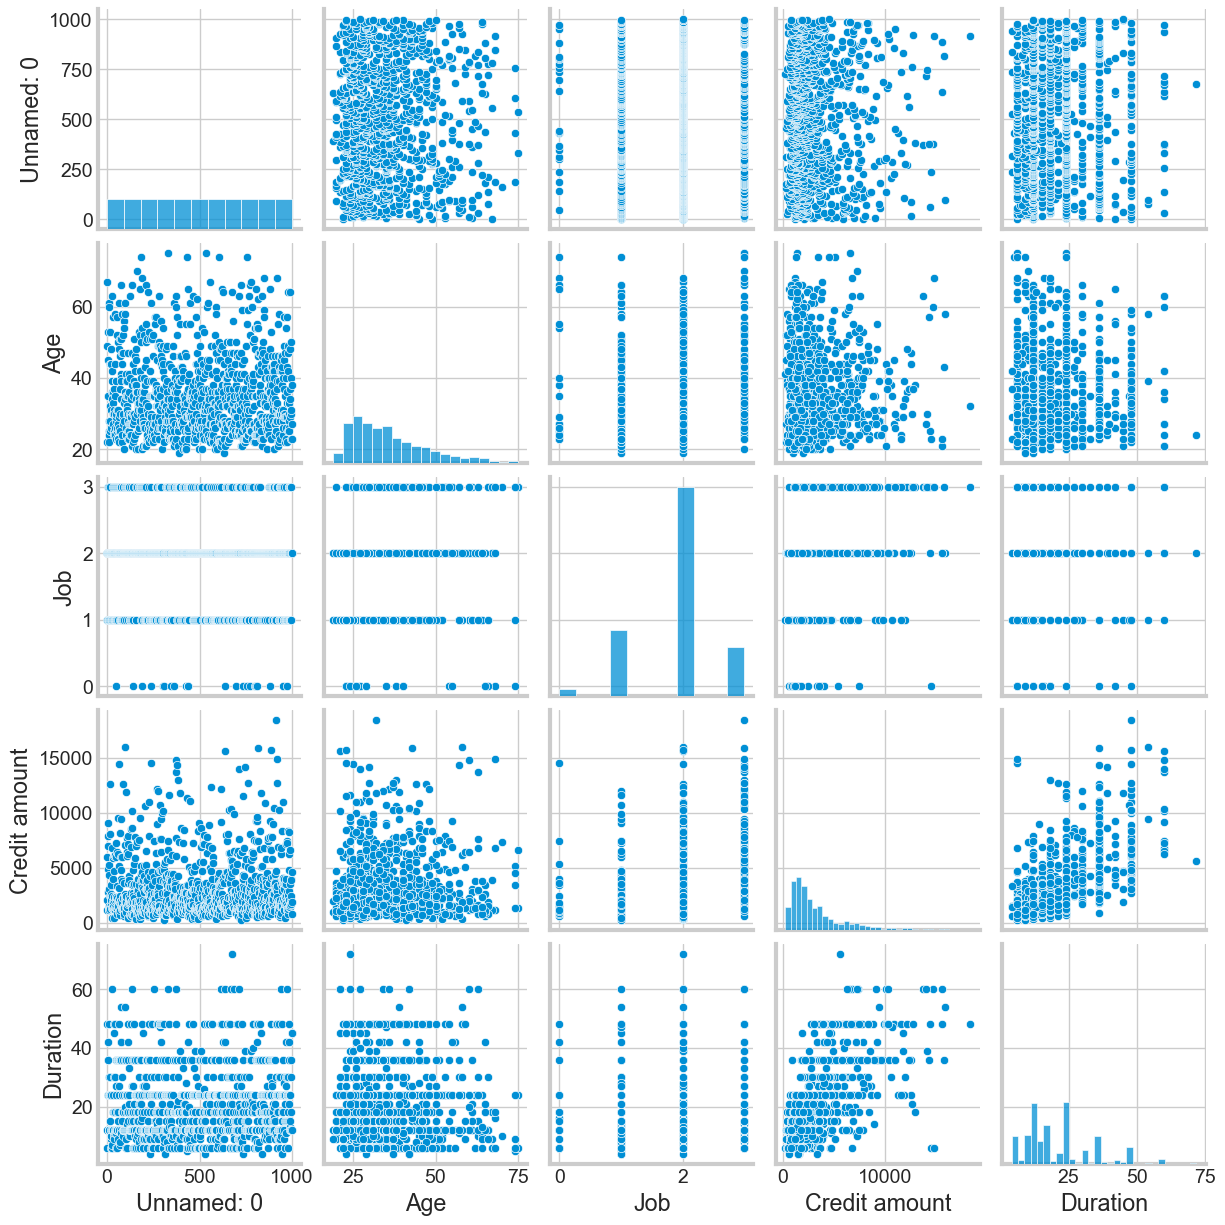

In [15]:
sns.pairplot(df)

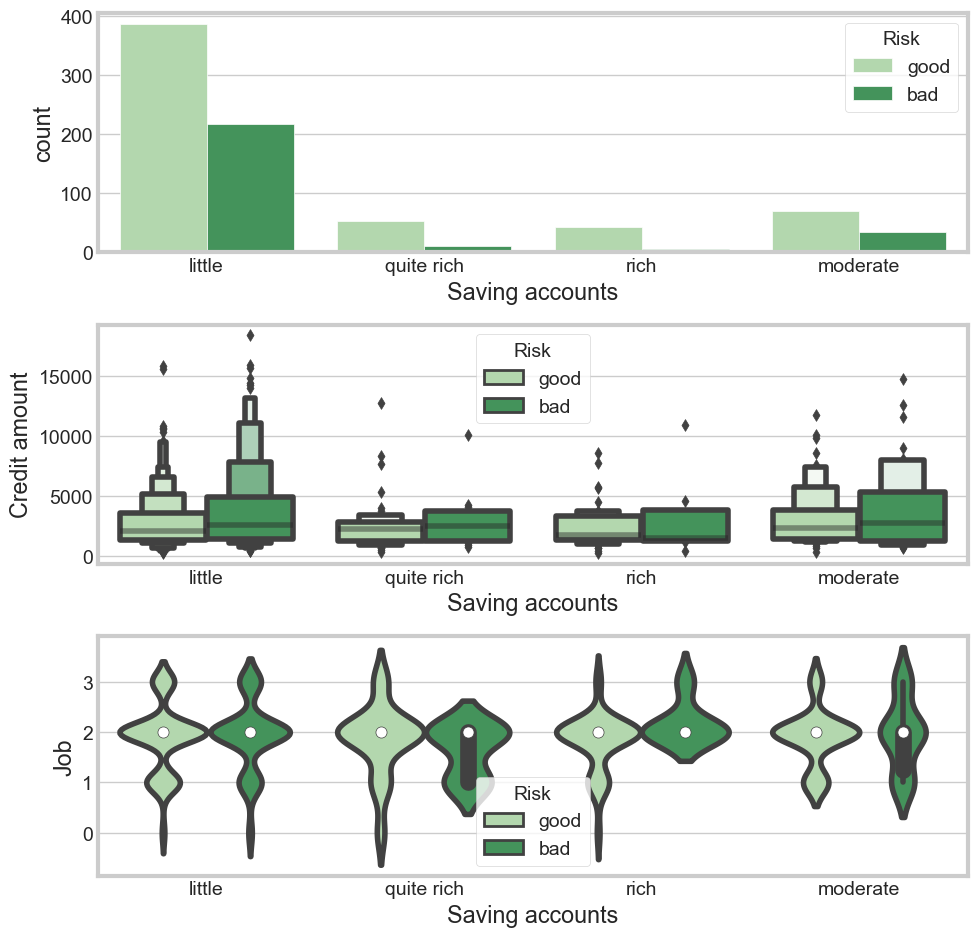

In [16]:
#SAVING ACCOUNT ANALYSIS


# DataFrame with columns 'Saving accounts', 'Risk', 'Credit amount', and 'Job'
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Countplot
sns.countplot(x='Saving accounts', hue='Risk', data=df, ax=ax[0], palette='Greens')

# Boxenplot
sns.boxenplot(x='Saving accounts', y='Credit amount', hue='Risk', data=df, ax=ax[1], palette='Greens')

# Violinplot
sns.violinplot(x='Saving accounts', y='Job', hue='Risk', data=df, ax=ax[2], palette='Greens')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter as needed

plt.show()


In [17]:
#SHOW BASIC STATS PER SAVING ACCOUNT¶
df.groupby('Saving accounts')[['Duration', 'Job', 'Credit amount']].describe().T

Saving accounts            little      moderate    quite rich          rich
Duration      count    603.000000    103.000000     63.000000     48.000000
              mean      20.441128     22.737864     19.031746     18.312500
              std       11.741163     13.776907     11.181737      8.550616
              min        4.000000      6.000000      6.000000      6.000000
              25%       12.000000     12.000000     12.000000     12.000000
              50%       18.000000     21.000000     15.000000     18.000000
              75%       24.000000     27.000000     24.000000     24.000000
              max       60.000000     72.000000     48.000000     48.000000
Job           count    603.000000    103.000000     63.000000     48.000000
              mean       1.903814      1.912621      1.809524      1.854167
              std        0.670227      0.595848      0.668584      0.545371
              min        0.000000      1.000000      0.000000      0.000000
              25%        2.000000      2.000000      2.000000      2.000000
              50%        2.000000      2.000000      2.000000      2.000000
              75%        2.000000      2.000000      2.000000      2.000000
              max        3.000000      3.000000      3.000000      3.000000
Credit amount count    603.000000    103.000000     63.000000     48.000000
              mean    3187.832504   3384.038835   2572.111111   2573.395833
              std     2787.683344   2874.944081   2208.532144   2174.447553
              min      276.000000    362.000000    338.000000    250.000000
              25%     1365.000000   1413.500000   1260.000000   1284.000000
              50%     2238.000000   2463.000000   2326.000000   1587.000000
              75%     3954.000000   4145.000000   2906.500000   3359.750000
              max    18424.000000  14782.000000  12749.000000  10961.000000

# ANALYSIS BY CREDIT CARD PURPOSE


C:\Users\annan\AppData\Local\Temp\ipykernel_18828\1853304095.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=10)


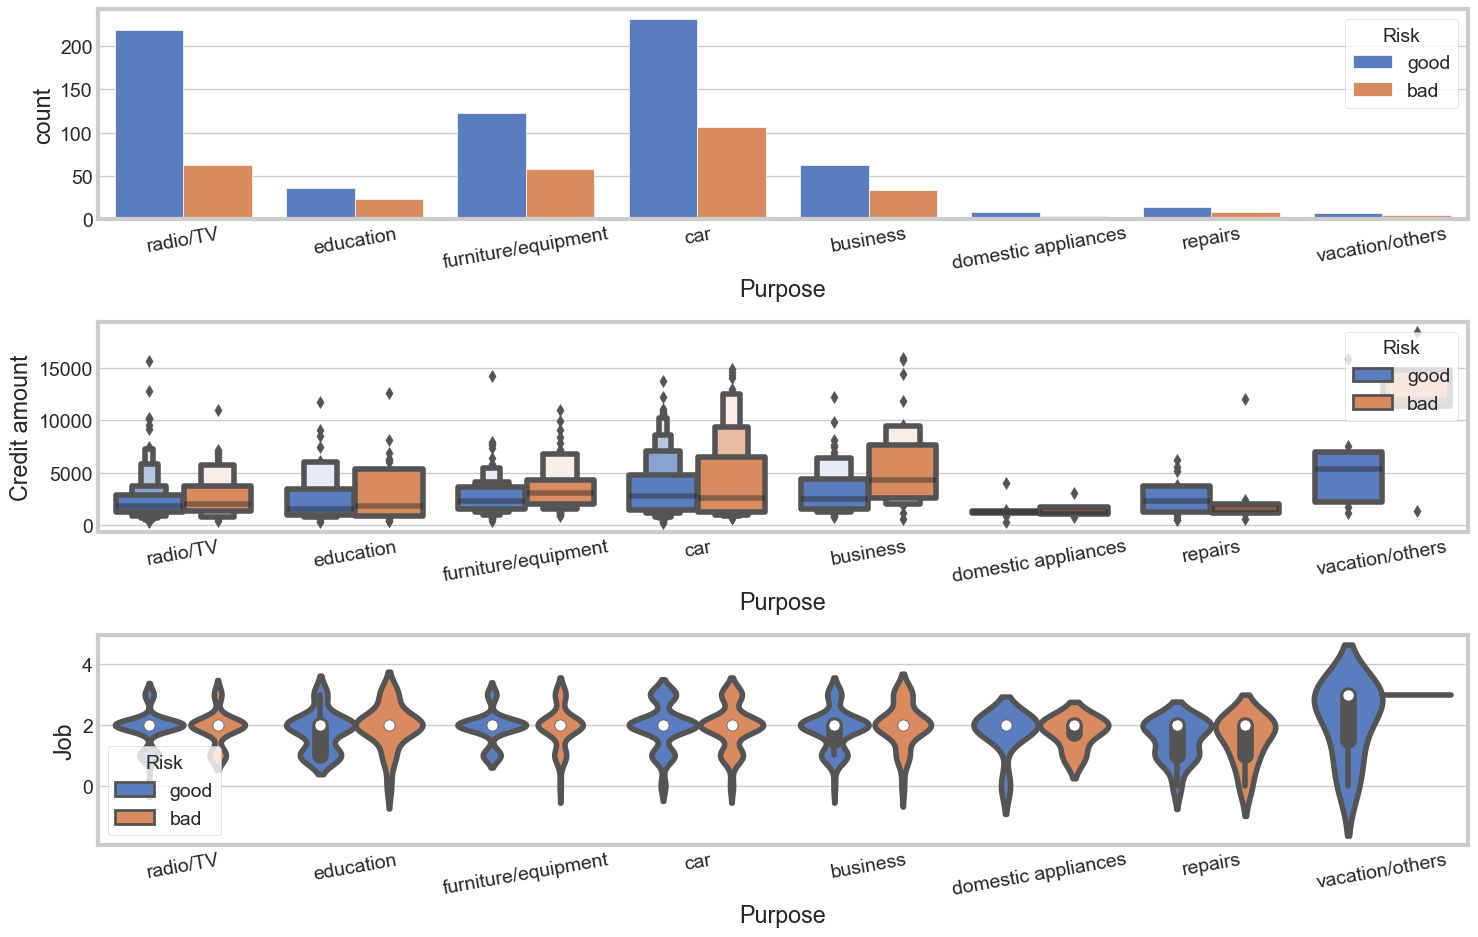

In [18]:

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

for i in range(3):
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=10)

# Check if 'Purpose' is in the columns of df
if 'Purpose' in df.columns:
    sns.countplot(x='Purpose', hue='Risk', data=df, ax=ax[0], palette='muted')
    sns.boxenplot(x='Purpose', y='Credit amount', hue='Risk', data=df, ax=ax[1], palette='muted')
    sns.violinplot(x='Purpose', y='Job', hue='Risk', data=df, ax=ax[2], palette='muted')

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter as needed

    plt.show()
else:
    print("Column 'Purpose' not found in DataFrame.")



# PER HOUSING 

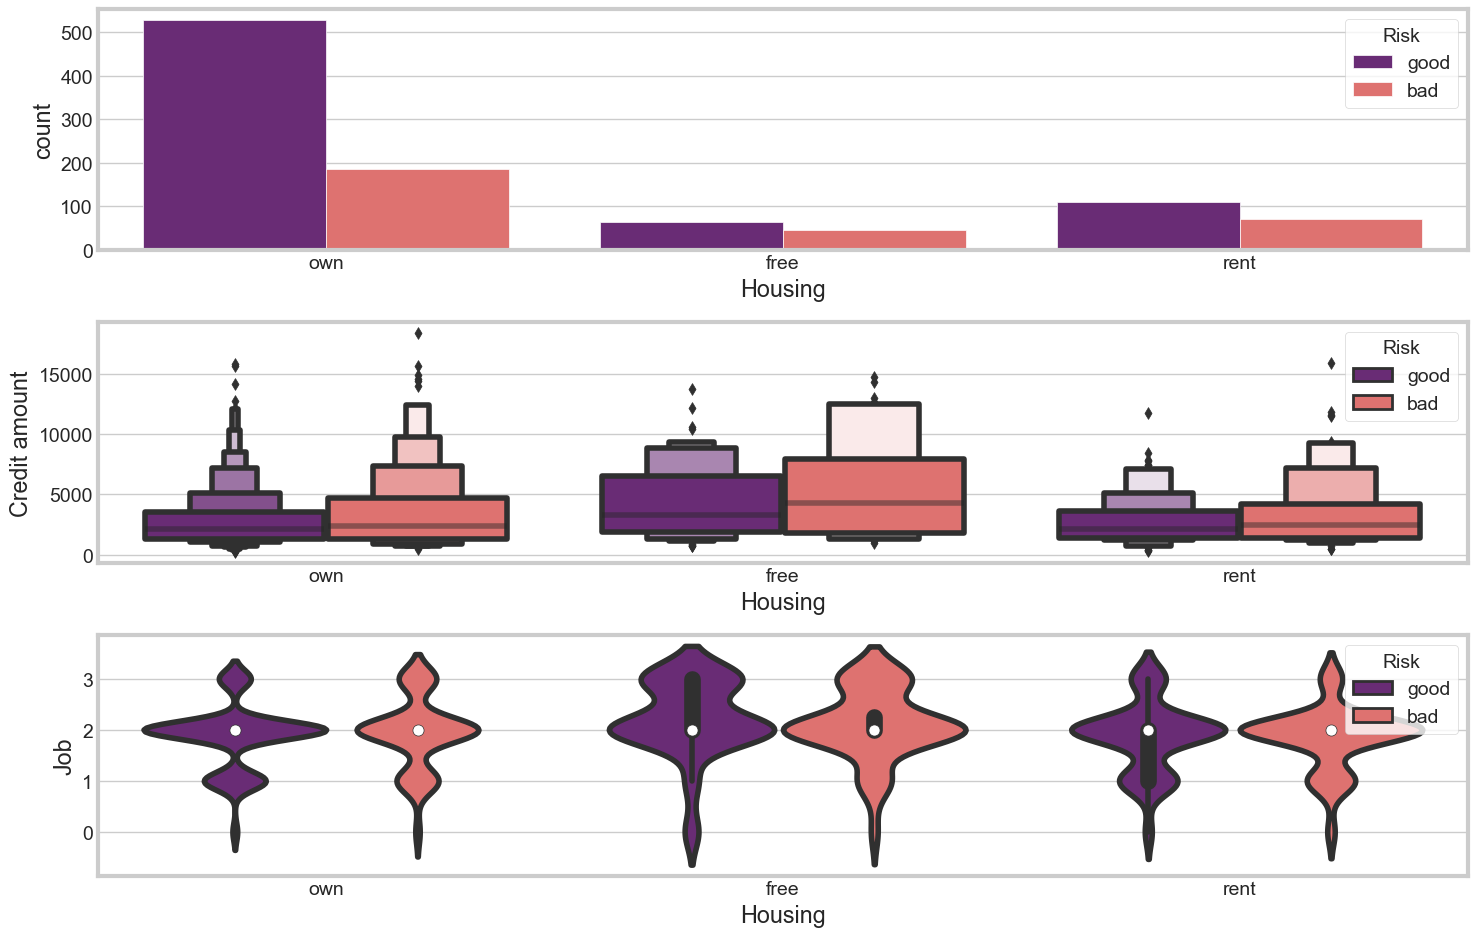

In [19]:
fig, ax =plt.subplots(3,1,figsize=(15,10))

sns.countplot(x='Housing', hue='Risk',data=df, ax=ax[0], palette='magma');
sns.boxenplot(x='Housing', y='Credit amount', hue='Risk',data=df, ax=ax[1], palette='magma');
sns.violinplot(x='Housing', y='Job', hue='Risk',data=df, ax=ax[2], palette='magma');

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter as needed

plt.show()

# DATA PREPROCESSING



In [20]:
# replace null values with unknown

df=df.fillna('unknown')

In [21]:
# checking the null values agian 

df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#drop the unnamed feature
df.drop('Unnamed: 0', axis=1, inplace=True)
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

In [22]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


In [23]:
#labelencode the categorical features
categorical_features = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for i, cat in enumerate(categorical_features):
    df[cat] = LabelEncoder().fit_transform(df[cat])

In [24]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


# NORMALIZE THE NUMERIC FEATURES


- APPLYING LOG TRANSFORMATION

In [25]:
num_df = df[['Age', 'Duration', 'Credit amount']]
num_df = np.log(num_df)

C:\Users\annan\AppData\Local\Temp\ipykernel_18828\598472019.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['Credit amount'], bins=40, ax=ax[0]);
C:\Users\annan\AppData\Local\Temp\ipykernel_18828\598472019.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['Duration'], bins=40

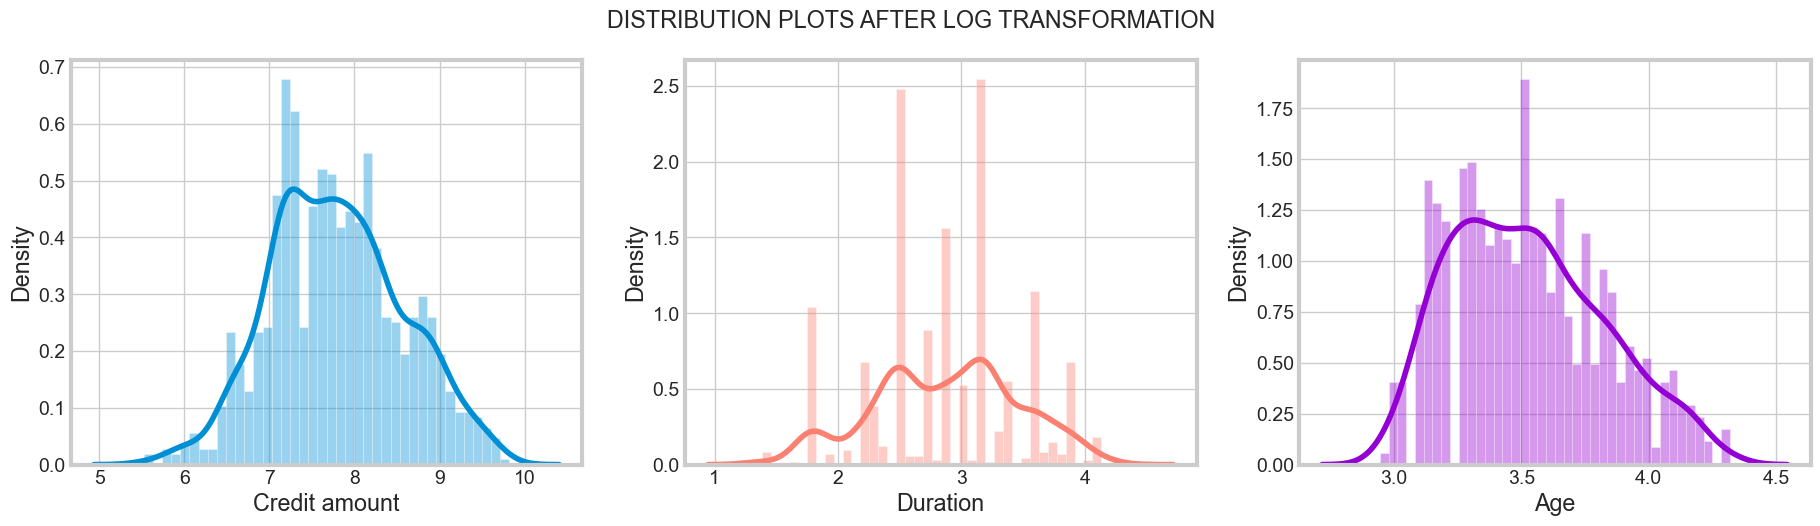

In [26]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS AFTER LOG TRANSFORMATION')
sns.distplot(num_df['Credit amount'], bins=40, ax=ax[0]);
sns.distplot(num_df['Duration'], bins=40, ax=ax[1], color='salmon');
sns.distplot(num_df['Age'], bins=40, ax=ax[2], color='darkviolet');

- STANDARDSCALING

In [27]:
scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

In [28]:
#show new values
print(num_df_scaled.shape)
num_df_scaled

(1000, 3)


array([[ 2.27100592, -1.86486906, -0.933901  ],
       [-1.44615223,  1.7083687 ,  1.16304581],
       [ 1.22669602, -0.67378981, -0.1815588 ],
       ...,
       [ 0.37810951, -0.67378981, -1.4161991 ],
       [-1.29778048,  1.59746802, -0.34591111],
       [-0.76258638,  1.59746802,  0.82450846]])

# CLUSTERING
# K-MEANS
- APPLYING ELBOW METHOD TO FIND THE BEST NUMBER OF CLUSTERS

C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

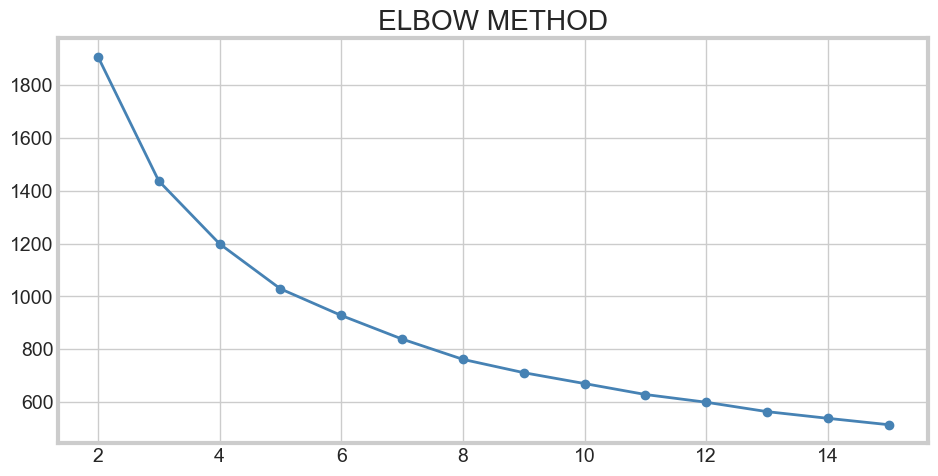

In [29]:
from sklearn.cluster import KMeans

inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(num_df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('ELBOW METHOD')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2, color='steelblue');

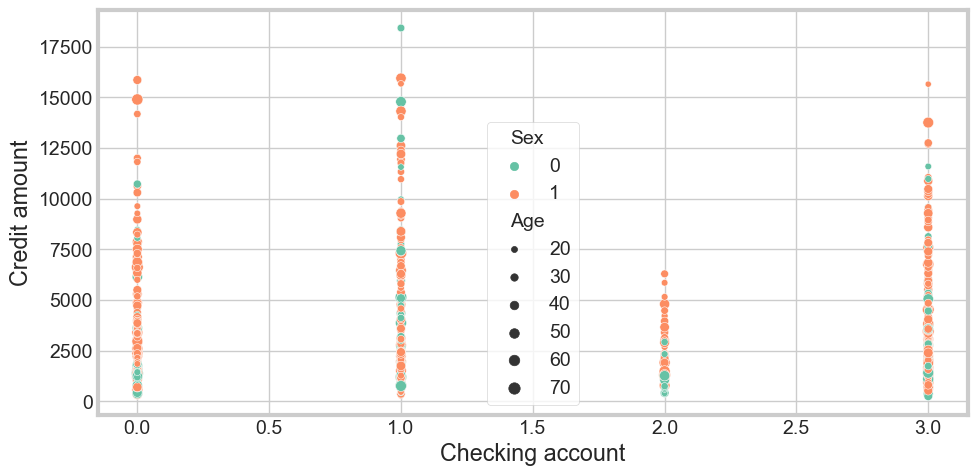

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1 , figsize = (10 , 5) )
sns.scatterplot(
    data=df,
    x="Checking account",
    y="Credit amount",
    hue="Sex",
    size="Age",
    palette="Set2"
);

# ALTERNATIVE METHOD: SILHOUTE SCORE WITH RANDOM SAMPLING

C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

<Axes: xlabel='seed', ylabel='num_cluster'>

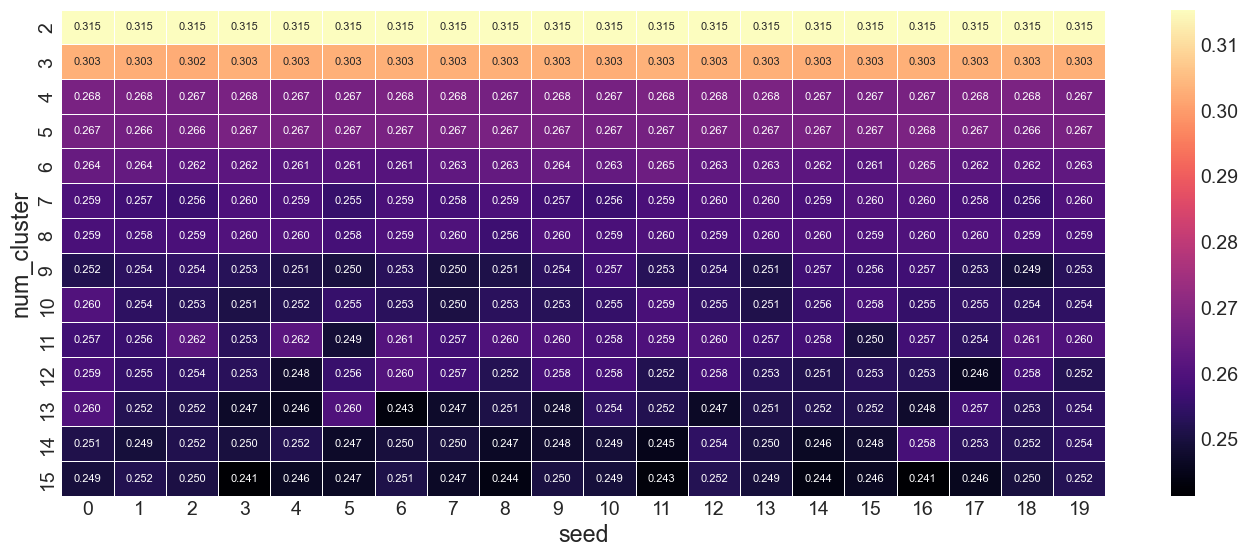

In [31]:
results = []
from sklearn.cluster import KMeans  # Make sure you import KMeans
from sklearn.metrics import silhouette_score  # Import silhouette_score

for i in range(2, 16):
    for r in range(20):
        kmeans = KMeans(n_clusters=i, random_state=r)
        c_labels = kmeans.fit_predict(num_df_scaled)
        sil_ave = silhouette_score(num_df_scaled, c_labels)
        results.append([i, r, sil_ave])

res_df = pd.DataFrame(results, columns=['num_cluster', 'seed', 'sil_score'])
pivot_kmeans = pd.pivot_table(res_df, index='num_cluster', columns='seed', values='sil_score')

plt.figure(figsize=(15, 6))
plt.tight_layout
sns.heatmap(pivot_kmeans, annot=True, linewidths=0.5, fmt='.3f', cmap='magma', annot_kws={"size": 8})


The scores of 2,3,4 and 5 are pretty stable, Let's pick a number of cluster from that range.

- AT 3 NUMBER OF CLUSTERS

In [35]:
km = KMeans(n_clusters=3, random_state=0)
clusters = km.fit_predict(num_df_scaled)



C:\Users\annan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
print(num_df_scaled.shape)
print(clusters.shape)


(1000, 3)
(1000,)


In [39]:
#from mpl_toolkits.mplot3d import Axes3D 
#import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(10, 6))
#ax = fig.add_subplot(111, projection='3d')

#for i in range(3):
    #cluster_points = num_df_scaled.loc[clusters == i]
    #ax.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], cluster_points.iloc[:, 2])

#plt.show()


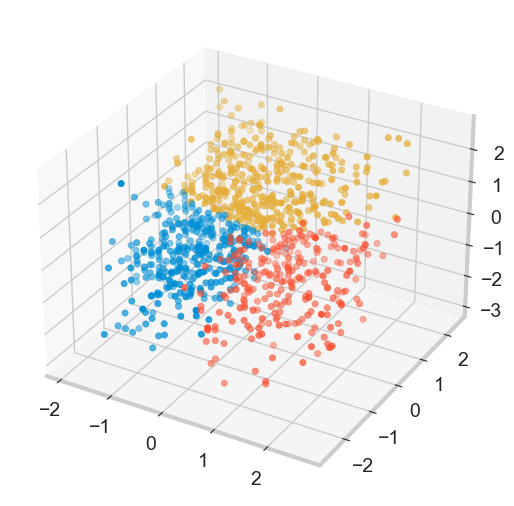

In [38]:
#show a 3D plot of clusters
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(3):
    ax.scatter(num_df_scaled[clusters ==i,0], num_df_scaled[clusters ==i,1], num_df_scaled[clusters ==i,2])

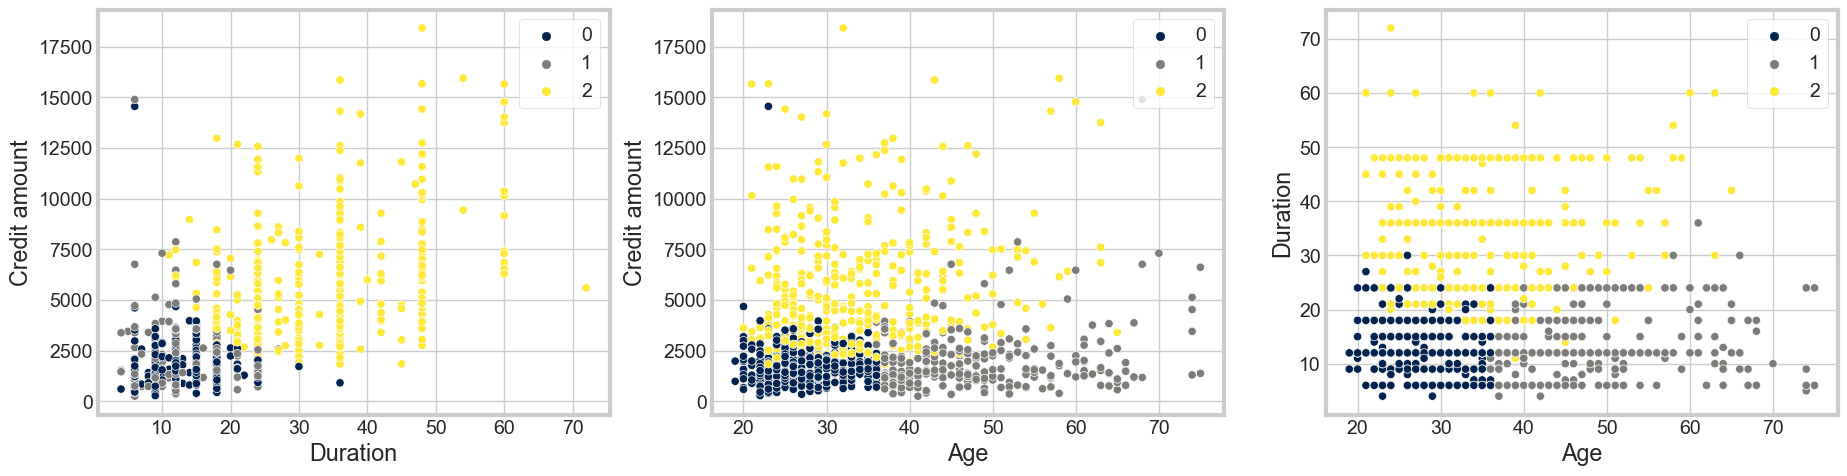

In [40]:
import seaborn as sns

fig, ax  = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x='Duration', y='Credit amount', data=df, hue=clusters, ax=ax[0], palette='cividis');
sns.scatterplot(x='Age', y='Credit amount',data=df, hue=clusters, ax=ax[1], palette='cividis');
sns.scatterplot(x='Age', y='Duration',data=df, hue=clusters, ax=ax[2], palette='cividis');

- LET'S CREATE A DATAFRAME TO SUMMARIZE THE RESULT

In [41]:
df_clustered = df[['Age', 'Duration', 'Credit amount']]
df_clustered['cluster'] = clusters

C:\Users\annan\AppData\Local\Temp\ipykernel_18828\2434150198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered['cluster'] = clusters


In [42]:
df_clustered.groupby('cluster').mean()

,Age,Duration,Credit amount
cluster,,,
0,27.784153,14.245902,1732.199454
1,48.691120,13.918919,1979.745174
2,34.042667,32.224000,5665.384000


- Cluster 0 are the older customers.
- Cluster 1 are the middle-Aged customers.
- Cluster 2 are the younger customers.

# PREDICTIVE MODELLING

In [43]:
num_df_scaled = pd.DataFrame(num_df_scaled, columns=['Age', 'Duration', 'Credit Amount'])
cat_df = df[categorical_features]

data = pd.concat([cat_df, num_df_scaled], axis=1)

In [44]:
#show the dataframe
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,4,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,3,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


# XGBOOST MODEL
- SPLIT THE DATA
- HYPERPARAMETER TUNING



In [46]:
x = data.drop('Risk', axis=1)
y = data['Risk']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

print('xtrain shape: ', x_train.shape)
print('xtest shape: ', x_test.shape)
print('ytrain shape: ', y_train.shape)
print('ytest shape: ', y_test.shape)

xtrain shape:  (800, 9)
xtest shape:  (200, 9)
ytrain shape:  (800,)
ytest shape:  (200,)


In [53]:
#RandomSearchCV
# define the parameters to tune
param_dist = {"learning_rate": uniform(0, 2),
              "gamma": uniform(1, 0.000001),
              "max_depth": range(1,50),
              "n_estimators": range(1,300),
              "min_child_weight": range(1,10),
              'n_jobs': range(1,5)}
#instance of RandomSearchCV
rs = RandomizedSearchCV(XGBClassifier(), param_distributions=param_dist, n_iter=25) #25 iterations


In [54]:

rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=25,
                   param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019466138550>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000194663BAD10>,
                                        'max_depth': range(1, 50),
                                        'min_child_weight': range(1, 10),
                                        'n_estimators': range(1, 300),
                                        'n_jobs': range(1, 5)})

# PREDICT THE TEST DATA

In [58]:
#PREDICT THE TEST DATA
from sklearn.metrics import classification_report
predictions = rs.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49        69
           1       0.73      0.91      0.81       131

    accuracy                           0.73       200
   macro avg       0.71      0.64      0.65       200
weighted avg       0.72      0.72      0.70       200



In [63]:
#PLOTTING ROC CURVE

from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

def plot_roc(X, y, estemator,n_splits, lns = 100):
    #creating an instance of KFold
    kfold = StratifiedKFold(n_splits=n_splits,shuffle=False)
    #define estemator
    rf = estemator
    #deifne figuresize
    plt.rcParams['figure.figsize'] = (10,5)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,lns)
    i = 1

    for train,test in kfold.split(X,y):
        #get prediction
        prediction = rf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
        #get the true pos. rate, false positive rate and thresh 
        fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        #get the area under the curve
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plot the tpr and fpr
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    #plot the mean ROC
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='gold',
    label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    #setup the labels
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title('ROC PLOT', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)


C:\Users\annan\AppData\Local\Temp\ipykernel_18828\722547416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\annan\AppData\Local\Temp\ipykernel_18828\722547416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\annan\AppData\Local\Temp\ipykernel_18828\722547416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\annan\AppData\Local\Temp\ipykernel_18828\722547416.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\annan\AppData\Local\Temp\ipykernel_18828\722547416.py:26: DeprecationWarning: scipy.interp is deprecated and will be remove

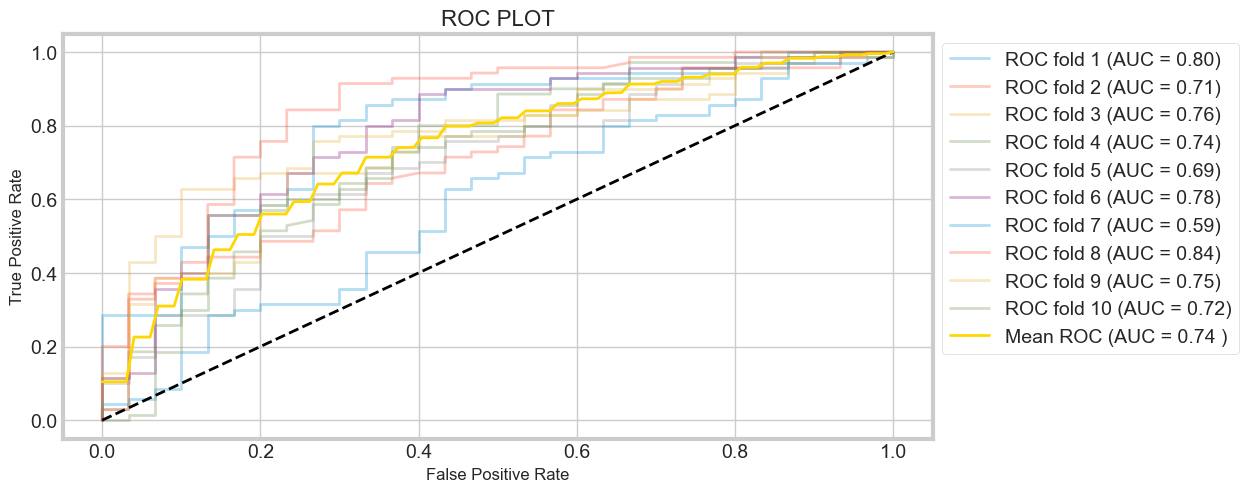

In [64]:
xgb_model = XGBClassifier()
xgb_model.set_params(**rs.best_params_)

plot_roc(x,y, xgb_model, n_splits=10)
